<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

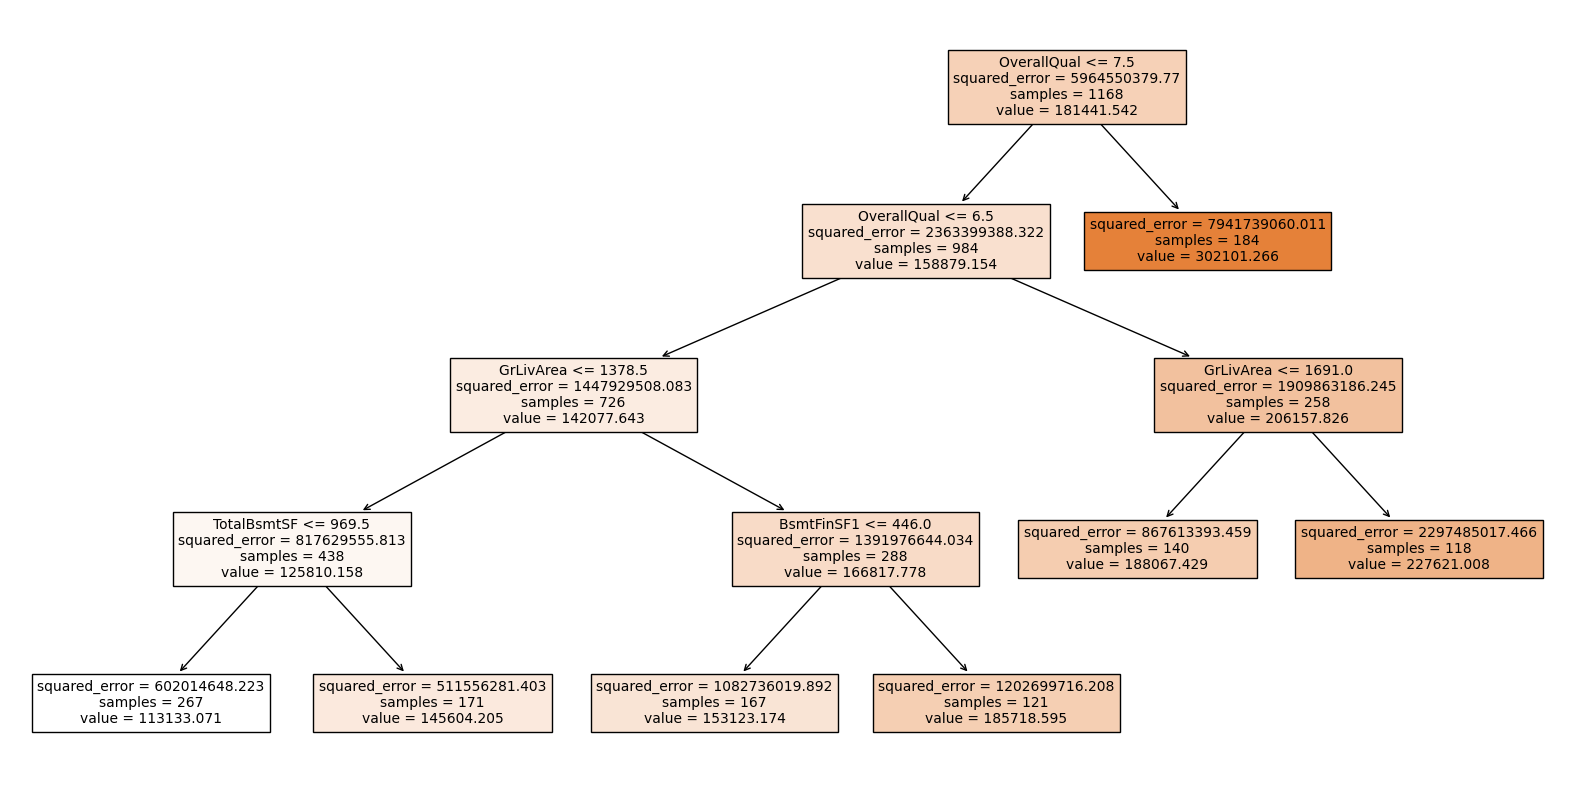

In [1]:
# Importation des bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error

# Chargement des données
data = pd.read_csv('train.csv')

# Affichage des types de données et des informations sur les valeurs manquantes
print(data.info())
print(data.isnull().sum())

# Liste des colonnes catégorielles
categorical_cols = data.select_dtypes(include=['object']).columns

# Encodage one-hot manuel des variables catégorielles
for col in categorical_cols:
    data = pd.concat([data.drop(col, axis=1), pd.get_dummies(data[col], prefix=col, drop_first=True)], axis=1)

# Division des données en variables explicatives et variable cible
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Création et entraînement du modèle d'arbre de décision
model = DecisionTreeRegressor(random_state=3, max_depth=4, min_samples_leaf=0.1)
model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test)

# Calcul de l'erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse/100:.2f}')

# Visualisation de l'arbre de décision
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, fontsize=10)
plt.show()